<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase02/Notebooks/b_Prepruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Clase 02 - Árboles de decisión__

En este ejercicio, aprenderemos a utilizar algunos métodos de pre-pruning para árboles de decisión. Estos métodos controlarán la complejidad de nuestros modelos. Los métodos serán:

1. Max depth
2. Max number of leaf nodes
3. Minimum impurity decrease
4. Minimun number of samples after a split


Primero, simularemos una base de datos

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

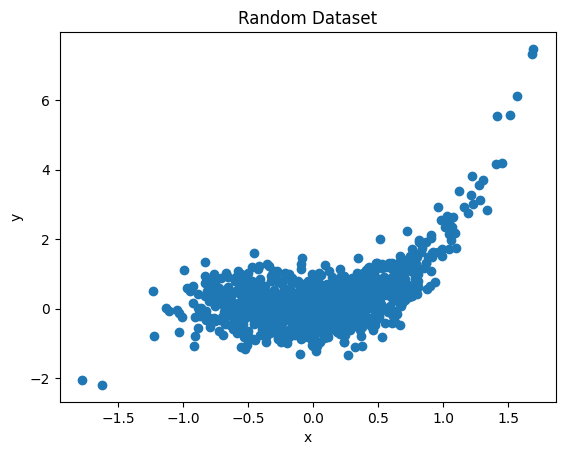

In [ ]:
np.random.seed(1701)

x = np.random.randn(1000)/2
y = x**2+x**3 + 0.5*np.random.randn(1000)

plt.scatter(x, y)
plt.title("Random Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 1. Máxima profundidad (``max_depth``)

El árbol crece hasta que llega al máximo límite de profundidad. Abajo, entrenamos árboles con ``max_depth`` variando de 1 a 6.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

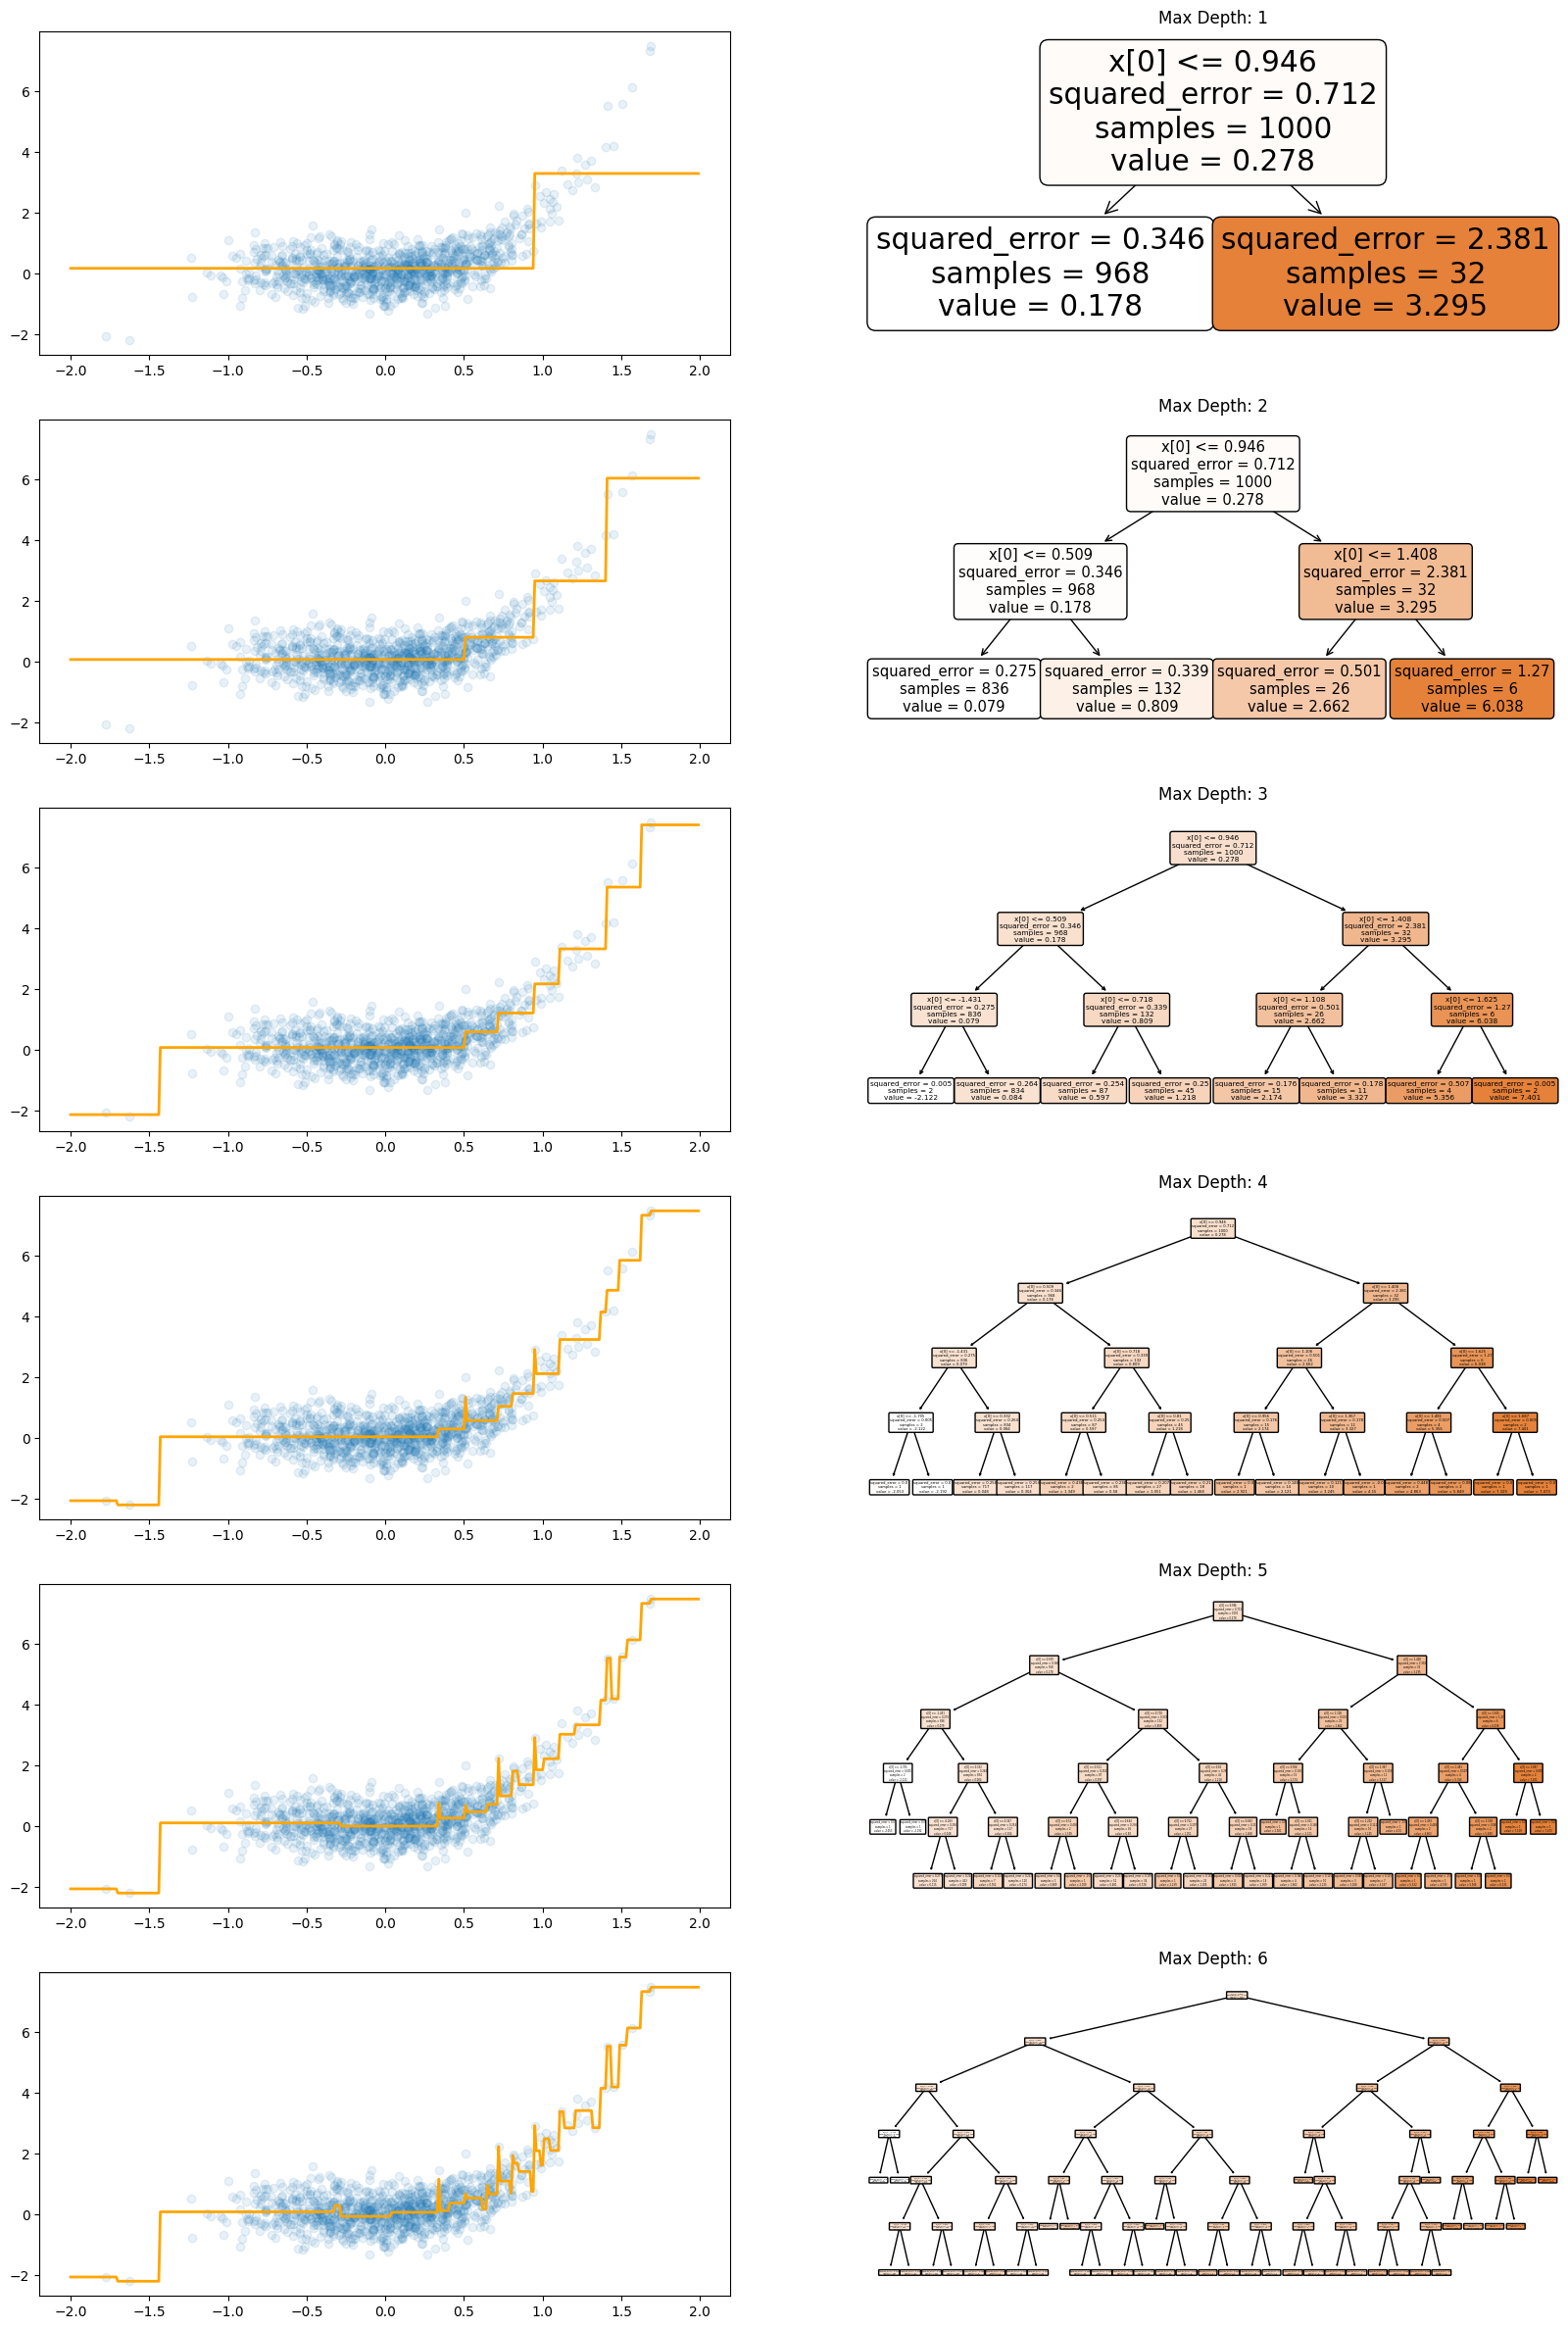

In [ ]:
from sklearn.tree import DecisionTreeRegressor

xp = np.arange(-2.0, 2.0, 0.01).reshape(-1, 1)

def plot_depth(model, d = 1):

    yp = model.predict(xp)

    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')

plt.figure(figsize = (20, 30))
for i in range(6):
    d = i+1
    model = DecisionTreeRegressor(max_depth = d)
    model.fit(np.array(x).reshape(-1,1), y)
    plt.subplot(6, 2, 2*d-1)
    plot_depth(model,d)
    plt.subplot(6, 2, 2*d)
    plot_tree(model,
          filled=True,
          rounded=True,)
    plt.title("Max Depth: {}".format(i+1))
plt.show()



## 2. Máximo número de nodos hoja (``max_leaf_nodes``)

El árbol crece hasta que llega al máximo límite de nodos hoja.

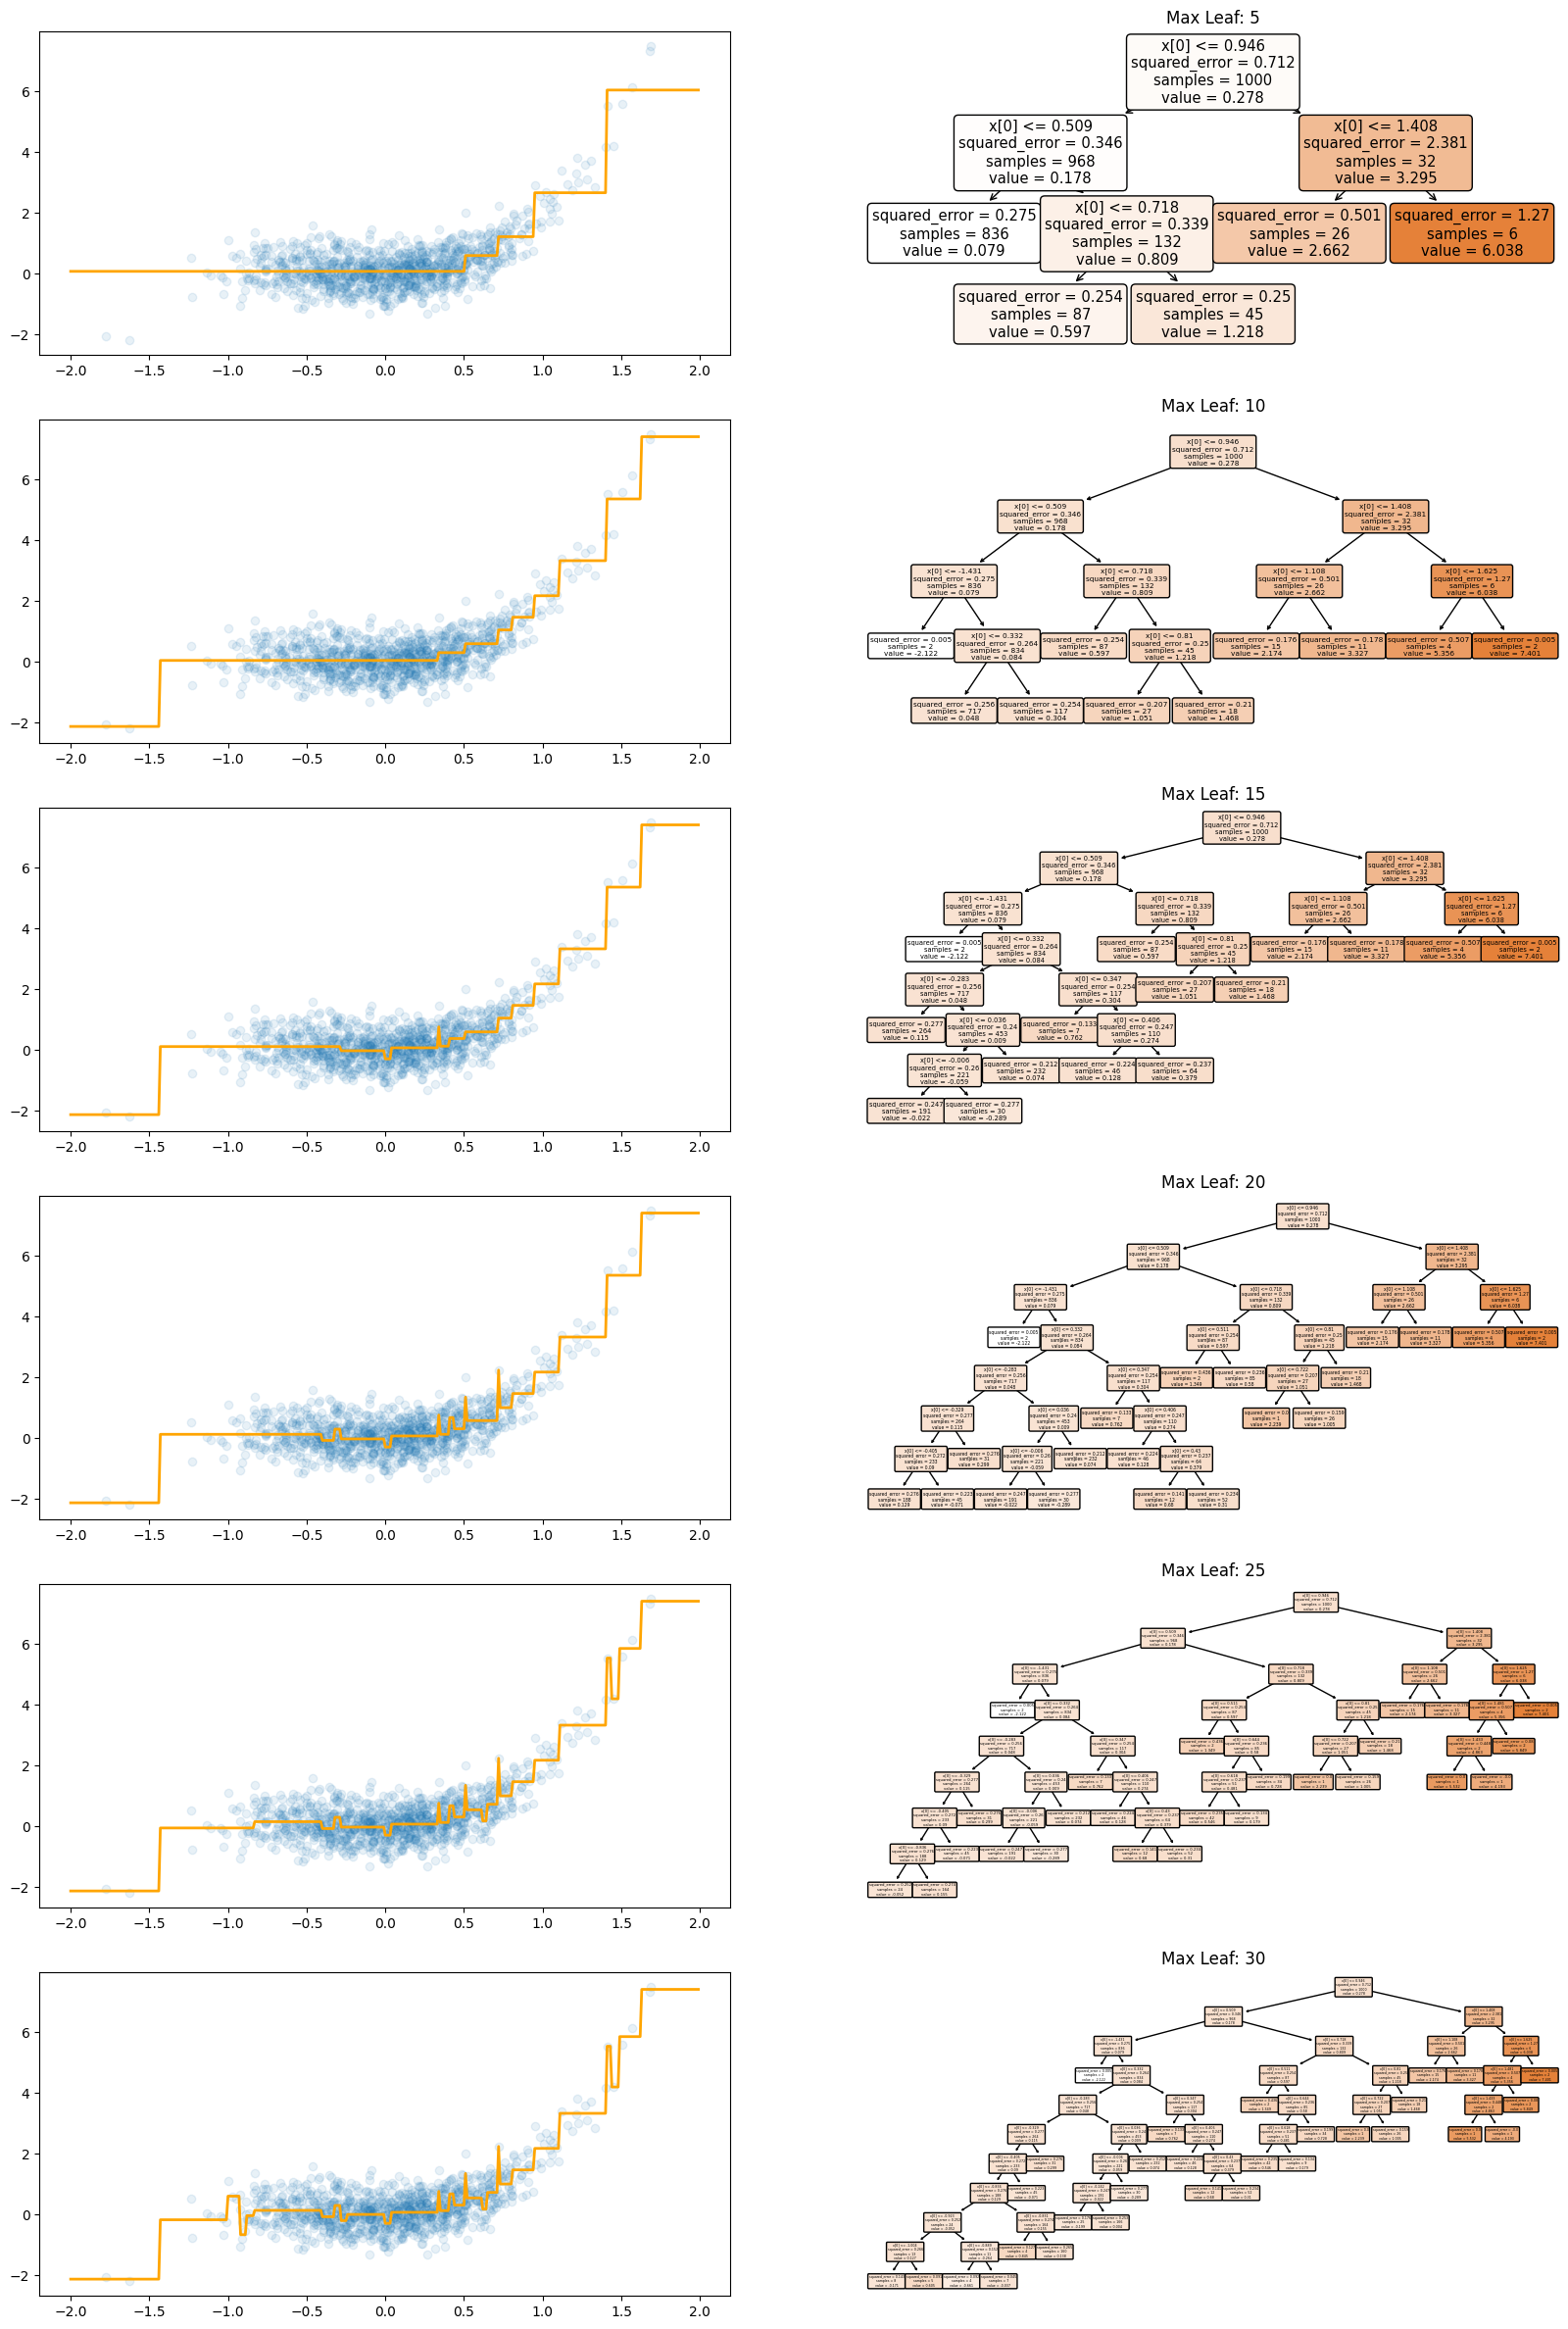

In [ ]:
def plot_leaf(model,d = 2):

    yp = model.predict(xp)

    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')

plt.figure(figsize = (20, 30))
for i in range(6):
    d = i+1
    model = DecisionTreeRegressor(max_leaf_nodes = 5*d)
    model.fit(np.array(x).reshape(-1,1), y)
    plt.subplot(6, 2, 2*d-1)
    plot_leaf(model,d)
    plt.subplot(6, 2, 2*d)
    plot_tree(model,
          filled=True,
          rounded=True,)
    plt.title("Max Leaf: {}".format(5*d))
plt.show()

## 3. Mínimo decrecimiento de la función de impureza (``min_impurity_decrease``)

El árbol crece si induce un decrecimiento de la función de impuresa más grande o igual a un valor. `sklearn` calcula a decrecimiento mínimo de la función de impureza de la siguiente forma:

$
\frac{N_t}{N} (impurity - \frac{N_{t_R}}{N_t} right\ impurity - \frac{N_{t_L}}{N_t} left\ impurity)
$

Donde $N$ es el número total de muestras, $N_t$ es el número de muestras en el nodo actual, $N_{t_L}$ es el número de muestras en el nodo hijo izquierdo y $N_{t_R}$ es el número de muestas en el nodo hijo derecho.

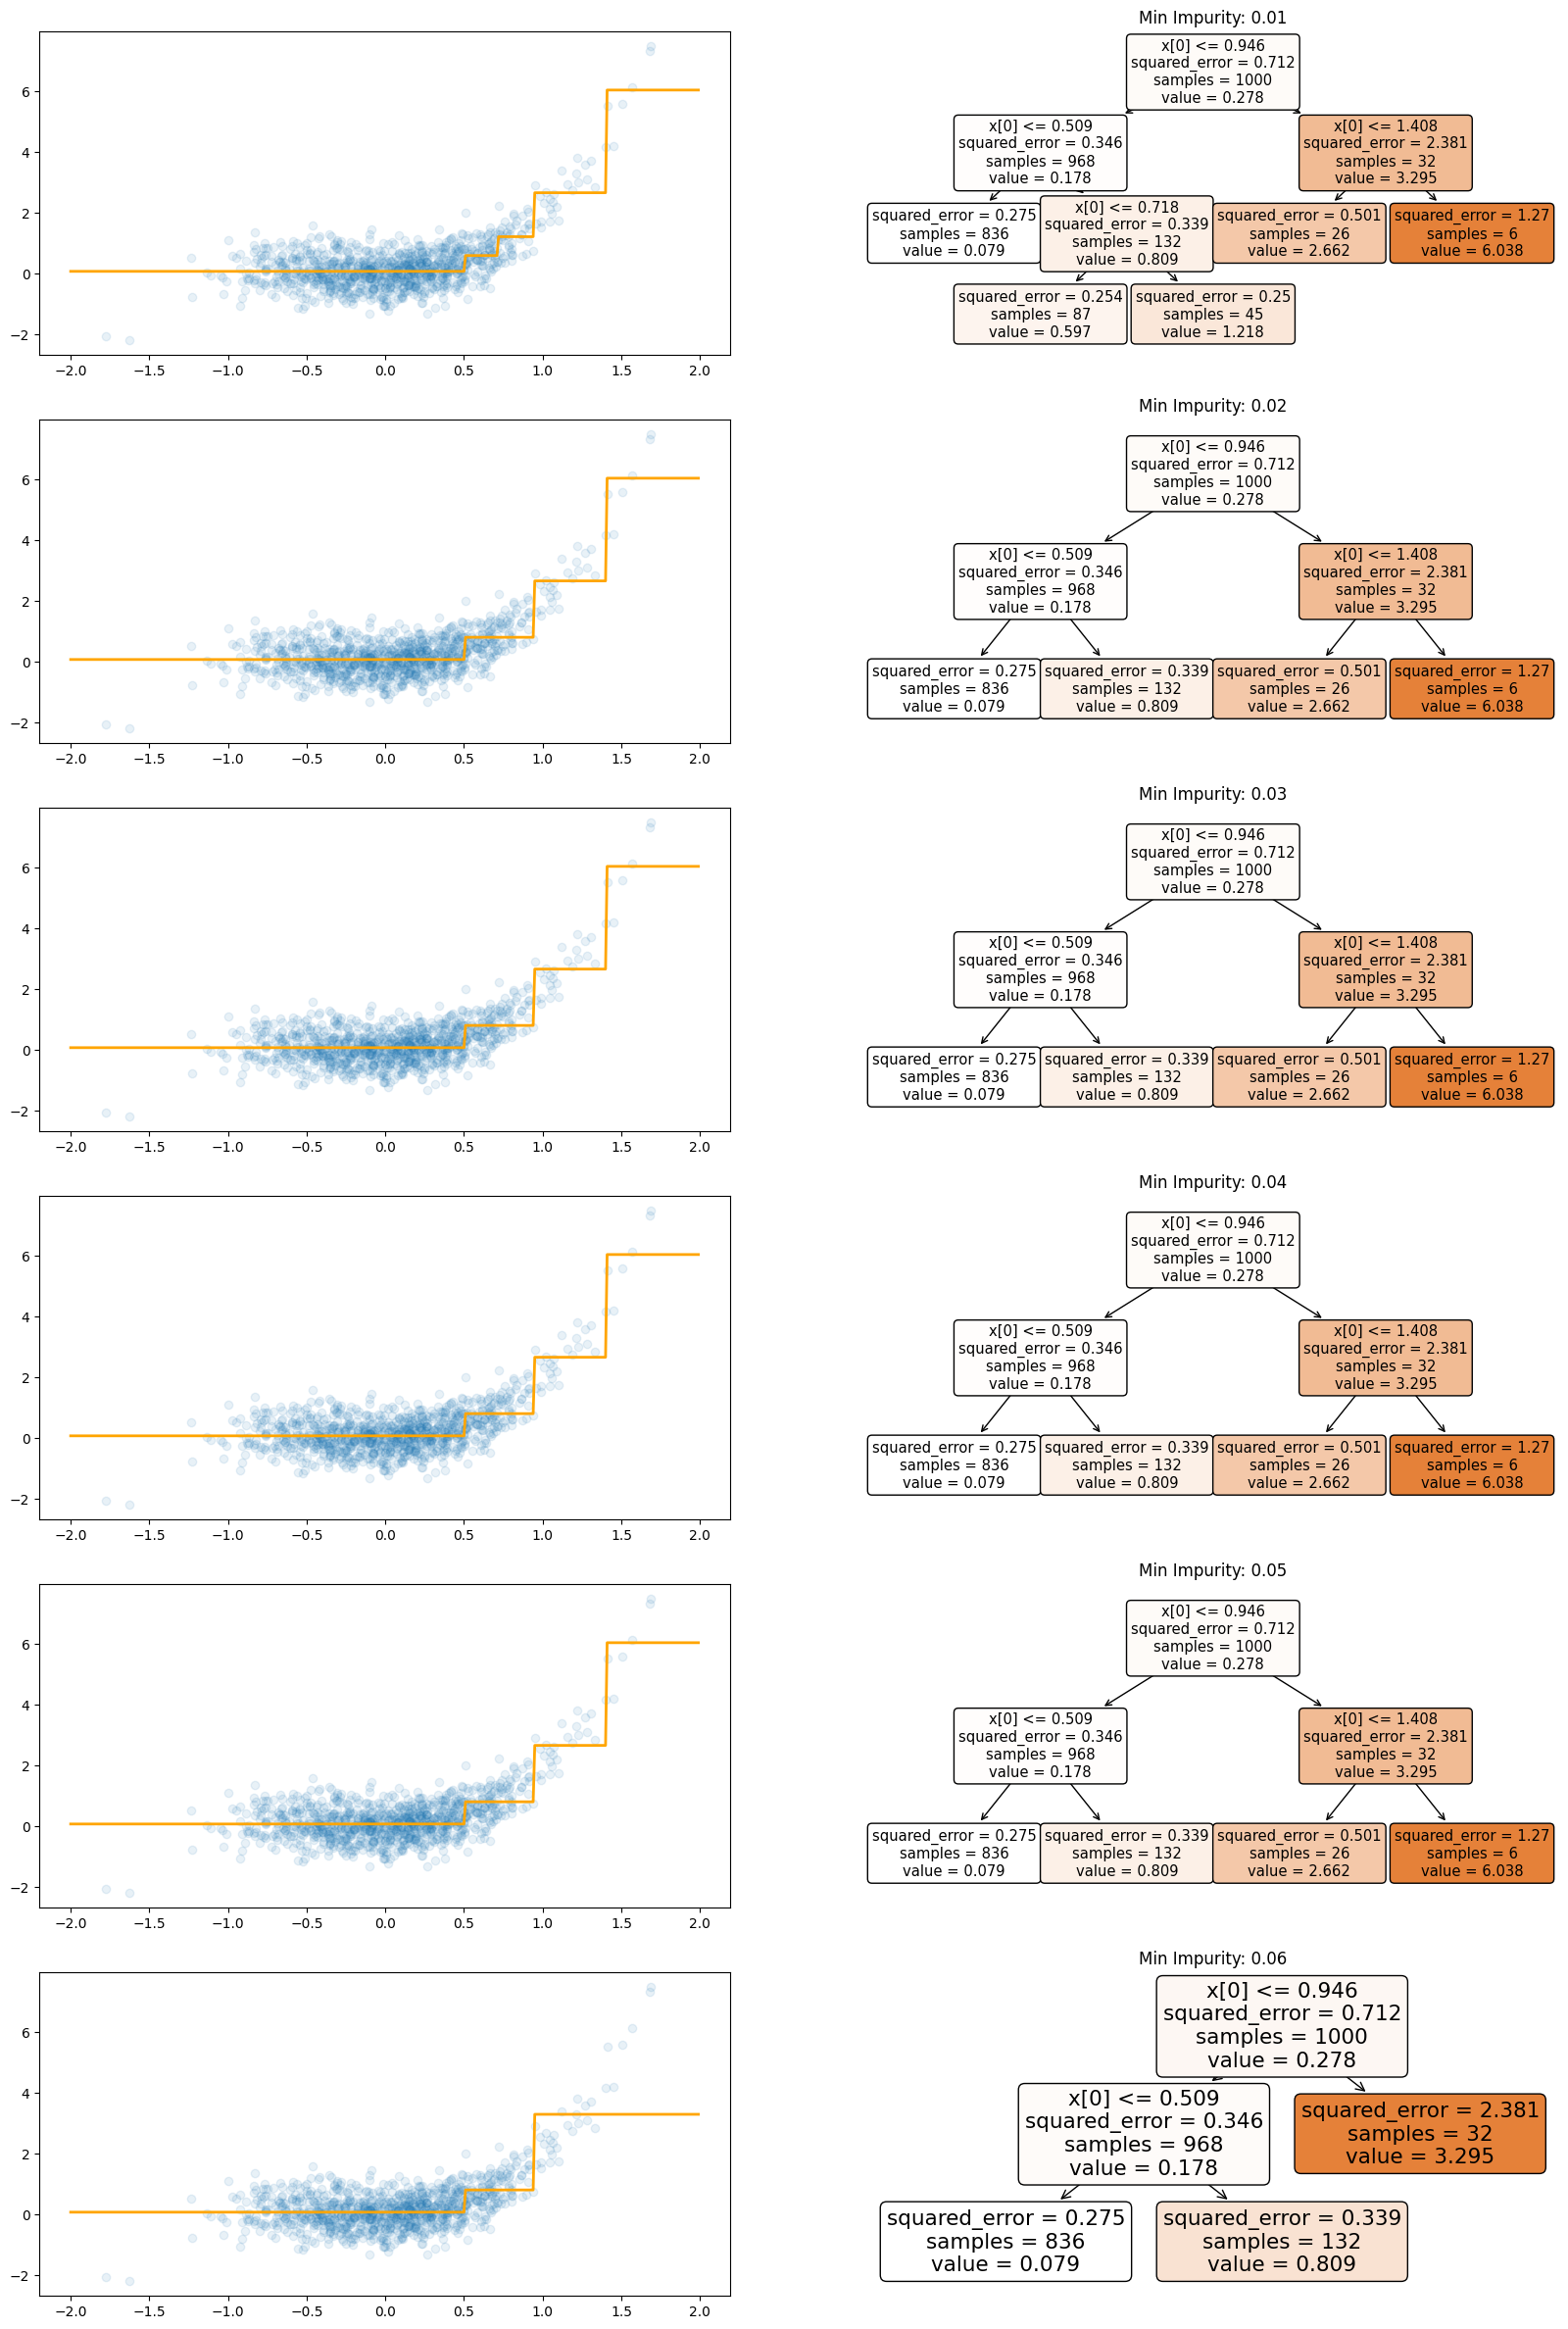

In [ ]:


def plot_imp(model, d = 0.0) :
    yp = model.predict(xp)

    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')

plt.figure(figsize = (20, 30))
for i in range(6):
    model = DecisionTreeRegressor(min_impurity_decrease = (i+1)/100)
    model.fit(np.array(x).reshape(-1,1), y)
    plt.subplot(6, 2, 2*i+1)
    plot_imp(model,((i+1)/100.0))
    plt.subplot(6, 2, 2*i+2)
    plot_tree(model,
          filled=True,
          rounded=True,)
    plt.title("Min Impurity: {}".format(((i+1)/100.0)))
plt.show()
